In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(color_codes=True)
#Read the data from csv
dataset = pd.read_csv('absenteeism.csv')

In [19]:
dataset.shape

(740, 21)

In [20]:
dataset.head(10)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Bod_mass_index,Absenteeism
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [21]:
#Check the types

dataset.dtypes

ID                                   int64
Reason_for_absence                   int64
Month_of_absence                     int64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average/day              float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                            int64
Son                                  int64
Social_drinker                       int64
Social_smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Bod_mass_index                       int64
Absenteeism                          int64
dtype: object

In [22]:
#Check the duplicates
duplicates = dataset[dataset.duplicated()]
print("Number of duplicated rows: ", duplicates.shape)

Number of duplicated rows:  (34, 21)


In [23]:
#Dropping the duplicates
dataset = dataset.drop_duplicates()
print(dataset.count())
dataset.shape

ID                                 706
Reason_for_absence                 706
Month_of_absence                   706
Day_of_the_week                    706
Seasons                            706
Transportation_expense             706
Distance_from_Residence_to_Work    706
Service_time                       706
Age                                706
Work_load_Average/day              706
Hit_target                         706
Disciplinary_failure               706
Education                          706
Son                                706
Social_drinker                     706
Social_smoker                      706
Pet                                706
Weight                             706
Height                             706
Bod_mass_index                     706
Absenteeism                        706
dtype: int64


(706, 21)

In [24]:
#Check for the missing values
print(dataset.isnull().sum())

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Bod_mass_index                     0
Absenteeism                        0
dtype: int64


In [25]:
#print summary statistics on atrubutes

print(dataset.describe())

ID  Reason_for_absence  Month_of_absence  Day_of_the_week  \
count  706.000000          706.000000        706.000000       706.000000   
mean    18.192635           18.882436          6.410765         3.890935   
std     10.927472            8.482877          3.404811         1.425503   
min      1.000000            0.000000          0.000000         2.000000   
25%     10.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.750000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation_expense  Distance_from_Residence_to_Work  \
count  706.000000              706.000000                       706.000000   
mean     2.549575              222.977337                        29.297450   
std      1.121527               67.293426                        14.706661   
min      1.000000 

Text(0.5, 0, 'Absence ID')

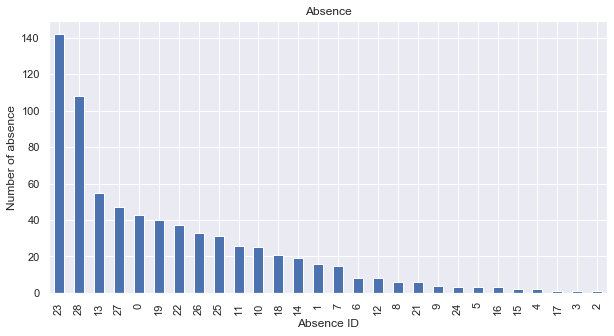

In [26]:
dataset.Reason_for_absence.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Absence")
plt.ylabel("Number of absence")
plt.xlabel("Absence ID")

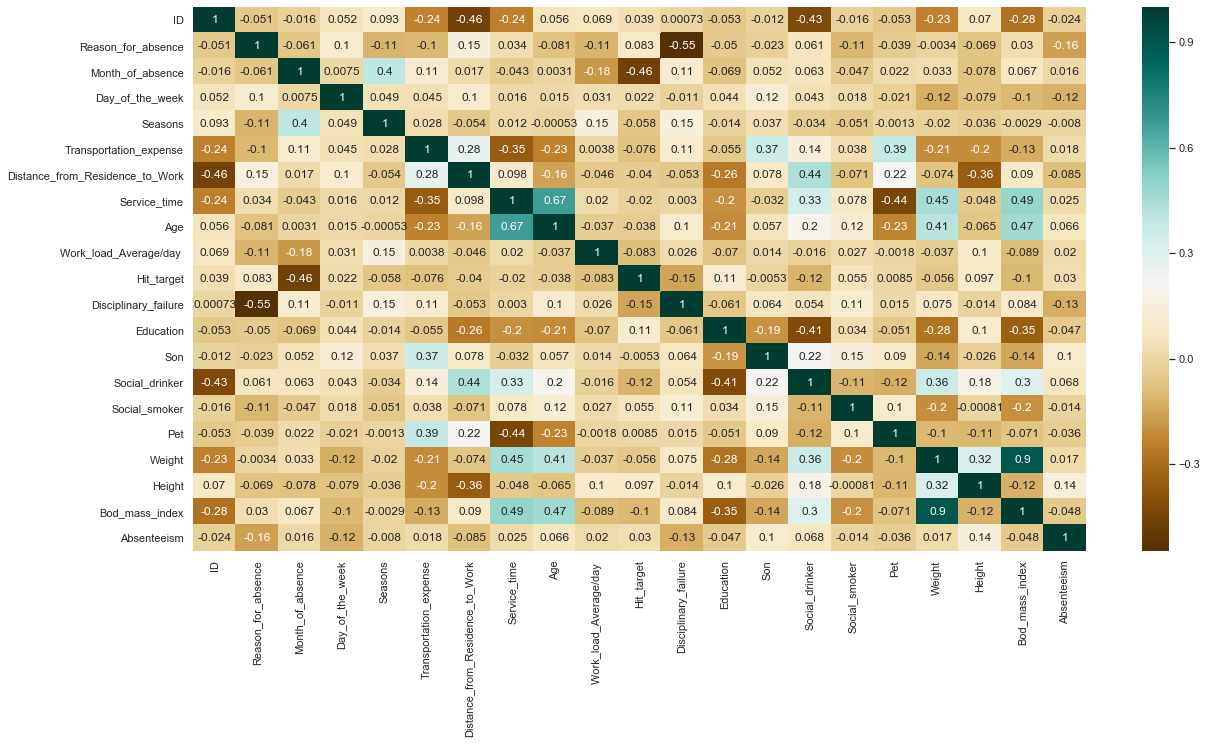

In [27]:
#Finding the relations between the variables
plt.figure(figsize=(20,10))
corl = dataset.corr()
sns.heatmap(corl, cmap="BrBG", annot=True)



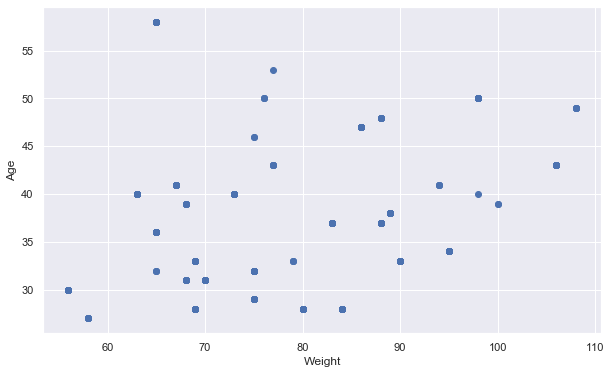

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dataset['Weight'], dataset['Age'])
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
plt.show()

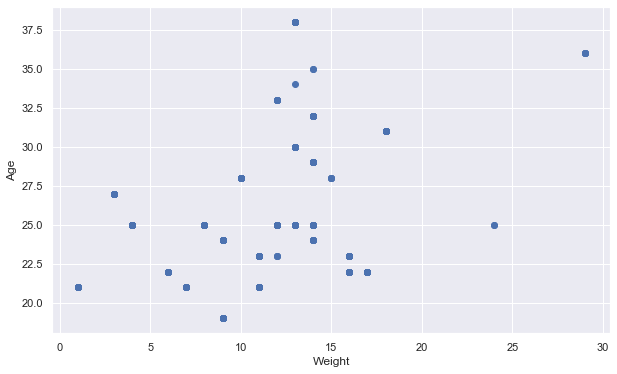

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dataset['Service_time'], dataset['Body_mass_index'])
ax.set_xlabel('Service Time')
ax.set_ylabel('BMI')
plt.show()

In [0]:
dataset.to_csv('preProcessedData.csv', index = None, header=True)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(color_codes=True)
#Read the data from csv
dataset = pd.read_csv('absenteeism.csv')
